In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
train_df=pd.read_csv('/content/gdrive/My Drive/titanictrain.csv')

In [125]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train_df.shape

(891, 12)

In [127]:
test_df=pd.read_csv('/content/gdrive/My Drive/titanictest.csv')

In [128]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
test_df.shape

(418, 11)

In [130]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#Visualising

In [132]:
def visualize(feature):
  survived=(train_df[train_df['Survived']==1][feature]).value_counts()
  dead=(train_df[train_df['Survived']==0][feature]).value_counts()
  df=pd.DataFrame([survived,dead])  
  df.index=['survived','dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5))
  return df

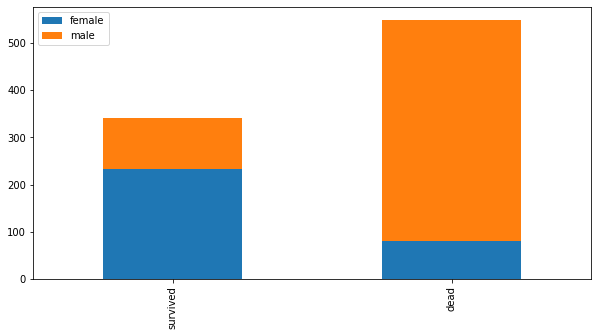

In [133]:
df=visualize('Sex')

In [134]:
print("Percentage of women survived:",df.female['survived']/df.female.sum())
print("Percentage of men survived:",df.male['survived']/df.male.sum())

Percentage of women survived: 0.7420382165605095
Percentage of men survived: 0.18890814558058924


<p><i>As we can see the  rate of survival of women is much higher than men.</i></br><b>So the gender of the passengers played a crucial factor in the titanic rescue operation</b></p>

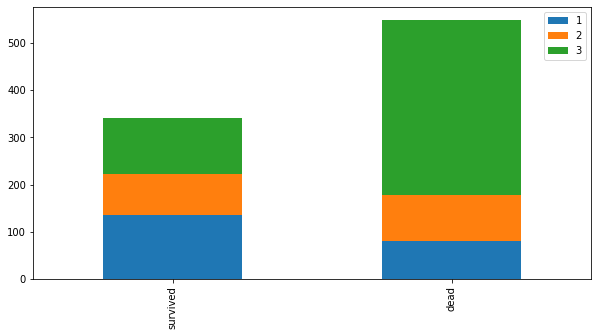

In [135]:
df=visualize('Pclass')

In [136]:
print("Percentage of class 1 survived:",df[1].survived/df[1].sum())
print("Percentage of class 2 survived:",df[2].survived/df[2].sum())
print("Percentage of class 3 survived:",df[3].survived/df[3].sum())

Percentage of class 1 survived: 0.6296296296296297
Percentage of class 2 survived: 0.47282608695652173
Percentage of class 3 survived: 0.24236252545824846


<p><i>As we can see the  rate of survival of class 1 is much higher than class 2 and class 3.</i></br><b>So the economic status of the passengers i.e their class played a crucial factor in the titanic rescue operation</b></p

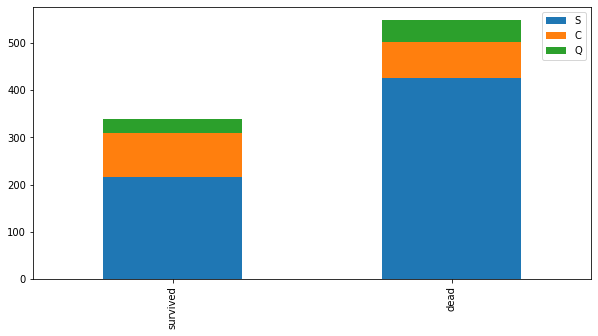

In [137]:
df=visualize('Embarked')

In [138]:
print("Embarked from Southampton survived:",df['S'].survived/df['S'].sum())
print("Embarked from Queenstown survived:",df['Q'].survived/df['Q'].sum())
print("Embarked from Cherboug",df['C'].survived/df['C'].sum())

Embarked from Southampton survived: 0.33695652173913043
Embarked from Queenstown survived: 0.38961038961038963
Embarked from Cherboug 0.5535714285714286


<i>As we can see people who left from <b>Cherboug have high chances of survival</b></i> 

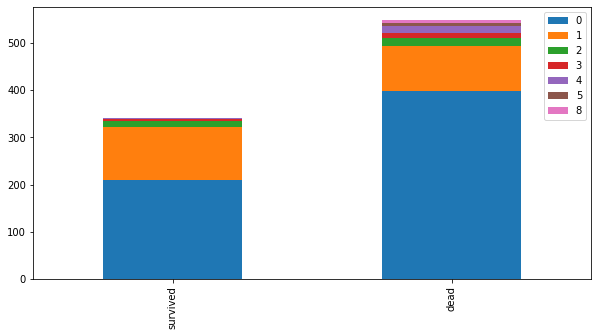

In [139]:
df=visualize('SibSp')
df.fillna(0,inplace=True)

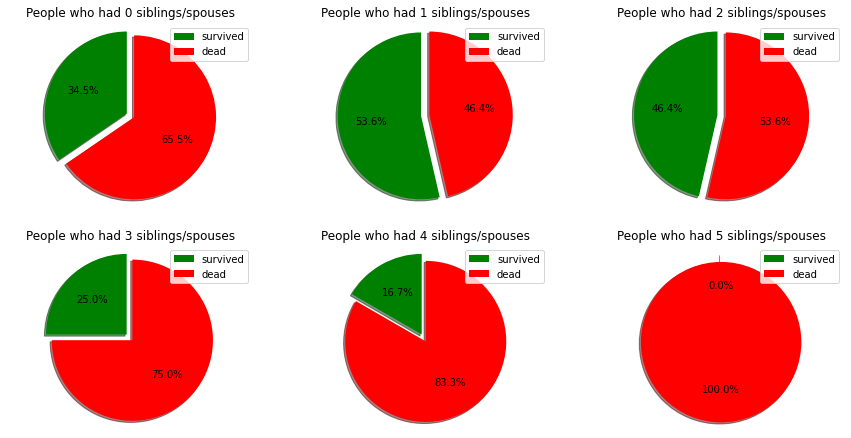

In [140]:
fig,ax=plt.subplots(2,3,figsize=(15,7.5))
k=0
for i in range(2):
  for j in range(3):
    if k<=5 :
      ax[i][j].pie(df[k],autopct='%1.1f%%',shadow=True,startangle=90,explode=[0.1,0],colors=['green','red'])
      ax[i][j].set_title('People who had '+str(k)+' siblings/spouses')
      ax[i][j].axis('equal')
      ax[i][j].legend(labels=['survived','dead'])
      k=k+1

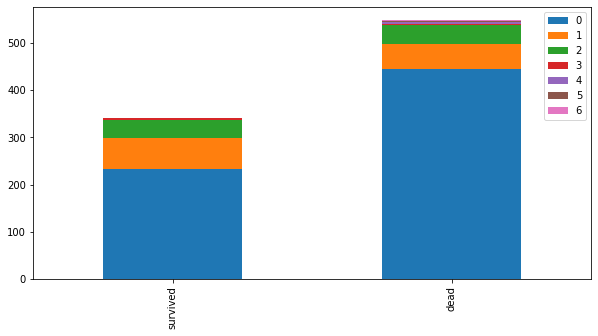

In [141]:
df=visualize('Parch')
df.fillna(0,inplace=True)

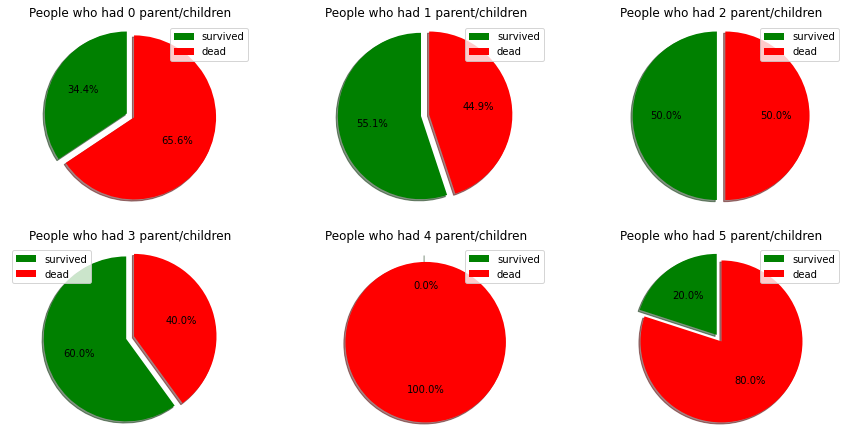

In [142]:
fig,ax=plt.subplots(2,3,figsize=(15,7.5))
k=0
for i in range(2):
  for j in range(3):
    if (k<=6):
      ax[i][j].pie(df[k],autopct='%1.1f%%',shadow=True,startangle=90,explode=[0.1,0],colors=['green','red'])
      ax[i][j].set_title('People who had '+str(k)+' parent/children')
      ax[i][j].axis('equal')
      ax[i][j].legend(labels=['survived','dead'])
      k=k+1

<center><b><h3>Now let's examine the Names and use that to fill the Ages</h3></b></center>

In [143]:
train_df['Name'].apply(lambda x: str(x))
test_df['Name'].apply(lambda x:str(x))
train_df['title']=train_df.Name.str.extract('([a-zA-Z]+\.)')
test_df['title']=test_df.Name.str.extract('([a-zA-Z]+\.)')
print(pd.unique(train_df['title']))

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


In [144]:
title_mapping={'Mr.':0,'Mrs.':1,'Miss.':2,'Master.':3,'Don.':3,'Rev.':3,'Dr.':3,'Mme.':3,'Ms.':3,'Major.':3,
 'Lady.':3,'Sir.':3,'Mlle.':3,'Col.':3,'Capt.':3,'Countess.':3,'Jonkheer.':3}
train_test_df=[train_df,test_df]
for dataset in train_test_df:
  dataset['title']=dataset['title'].map(title_mapping)

In [145]:
train_df.drop(['Name'],axis=1,inplace=True)
test_df.drop(['Name'],axis=1,inplace=True)

In [146]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['Sex']=le.fit_transform(train_df['Sex'])
test_df['Sex']=le.fit_transform(test_df['Sex'])

In [147]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [148]:
train_df=pd.get_dummies(train_df,drop_first=True,columns=['Embarked'])
test_df=pd.get_dummies(test_df,drop_first=True,columns=['Embarked'])

In [149]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,1


In [150]:
train_df['Age'].fillna(train_df.groupby('title')['Age'].transform("median"),inplace=True)
test_df['Age'].fillna(train_df.groupby('title')['Age'].transform("median"),inplace=True)

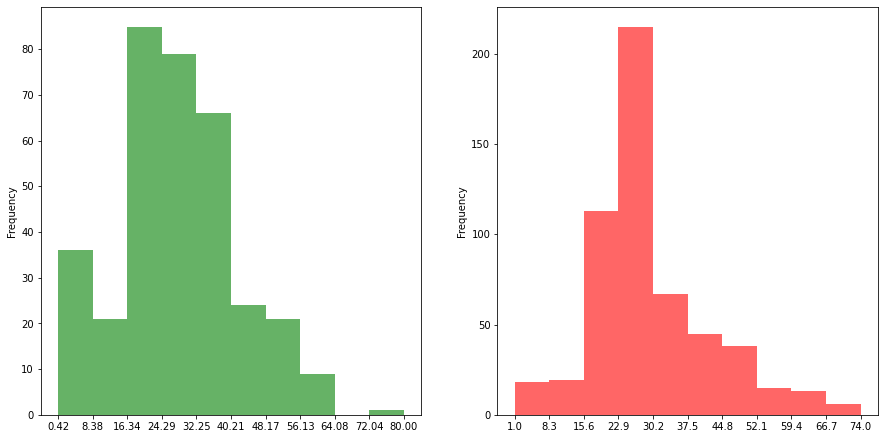

In [151]:
f, axes = plt.subplots(1, 2,figsize=(15,7.5))
counts,bin_edgess=np.histogram(train_df[train_df['Survived']==1]['Age'].fillna(0),bins=10)
train_df[train_df['Survived']==1]['Age'].plot(kind='hist',xticks=bin_edgess,bins=10,alpha=0.6,color='g',ax=axes[0],label='survived')
countd,bin_edgesd=np.histogram(train_df[train_df['Survived']==0]['Age'].fillna(0),bins=10)
train_df[train_df['Survived']==0]['Age'].plot(kind='hist',xticks=bin_edgesd,bins=10,alpha=0.6,color='r',ax=axes[1],label='dead')

In [152]:
survivalrate=counts/(counts+countd)
a=pd.DataFrame(bin_edgess[1:,].round(),survivalrate)
a.columns=['Age<=']
a['survival-rate']=a.index
a.index=range(len(a))
a

,Age<=,survival-rate
0,8.0,0.666667
1,16.0,0.525000
2,24.0,0.429293
3,32.0,0.268707
4,40.0,0.496241
5,48.0,0.347826
6,56.0,0.355932
7,64.0,0.375000
8,72.0,0.000000
9,80.0,0.142857


<i>As we can see the survival rate of people with less age is high compared to older ages with the exception of 24-32 age</i></br>
<b>Let's see with facetplot 

In [153]:
import seaborn as sns 

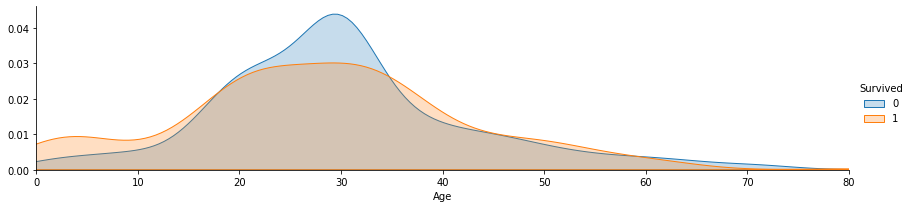

In [154]:
facet=sns.FacetGrid(train_df,hue='Survived',aspect=4,xlim=(0,train_df['Age'].max()))
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
plt.show()

In [155]:
x_train=train_df.drop(['Ticket','Cabin','PassengerId','Survived'],axis=1)
y_train=train_df['Survived']
x_test=test_df.drop(['Ticket','Cabin','PassengerId'],axis=1)

In [156]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [157]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

In [158]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [159]:
kfold=KFold(n_splits=10,shuffle=True,random_state=1)

In [160]:
SupVec=SVC(C=0.10,kernel='rbf')
a=cross_val_score(SupVec,cv=kfold,X=x_train,y=y_train)
print("accuracy(SVM):",np.mean(a))

accuracy(SVM): 0.8227590511860174


In [161]:
lr=LogisticRegression()
a=cross_val_score(lr,x_train,y_train,cv=kfold)
print("accuracy(LogReg):",np.mean(a))

accuracy(LogReg): 0.8058801498127341


In [162]:
rfc=RandomForestClassifier()
a=cross_val_score(rfc,x_train,y_train,cv=kfold)
print("accuracy(RandForClassifier):",np.mean(a))

accuracy(RandForClassifier): 0.8126342072409489


In [163]:
knn=KNeighborsClassifier(n_neighbors=13)
a=cross_val_score(knn,x_train,y_train,cv=kfold)
print("accuracy(KNeighbourClassifier):",np.mean(a))

accuracy(KNeighbourClassifier): 0.8148813982521848


In [164]:
gnb=GaussianNB()
a=cross_val_score(gnb,x_train,y_train,cv=kfold)
print("accuracy(GaussianNB):",np.mean(a))

accuracy(GaussianNB): 0.8003121098626715


In [165]:
tree=DecisionTreeClassifier()
a=cross_val_score(tree,x_train,y_train,cv=kfold)
print("accuracy(DecisionTreeClassifier):",np.mean(a))

accuracy(DecisionTreeClassifier): 0.7733208489388265
